## **Implementing the Edit Distance for Word Autocompletion and Autocorrection**

**Edit Distance:**

The Edit distance is a text similarity measure that compares two words and returns a numeric value representing the distance between them. The distance reflects the total number of single-character edits required to transform one word into another. The more similar the two words are the less distance between them, and vice versa. One common use for this distance is in the autocompletion or autocorrection features of text processors or chat applications.

**Dictionary Search for Word Autocompletion and Autocorrection**

One application of the Edit distance is to help the writer write faster by automatically correcting typos or completing words. In this topic we are experimenting with a small version of the English dictionary (which contains 3,000 common words) to complete this task. The dictionary is available for download at [this link](https://www.ef.com/wwen/english-resources/english-vocabulary/top-3000-words/).

**The sections covered are as follows:**

1. Creating the distances matrix
2. Initializing the distances matrix
3. Calculating distances between all prefixes
4. Printing the distances matrix.
5. Dictionary search for autocompletion/autocorrection

In [ ]:
import numpy #importing the numpy module

**1. Creating the distances matrix**

Using the dynamic programming approach for calculating the Levenshtein distance, a 2-D matrix is created that holds the distances between all prefixes of the two words being compared.

We created a function named levenshteinDistanceDP() that accepts 2 arguments named token1 and token2, representing the two words. It returns an integer representing the distance between them.

**2. Initializing the distances matrix**

The next step is to initialize the first row and column of the matrix with integers starting from 0. We'll do that with the for loop shown below, which uses a variable named t1 (shortcut for token1) that starts from 0 and ends at the length of the second word. Note that the row index is fixed to 0 and the variable t1 is used to define the column index. By doing that, the first row is filled with values starting from 0.

For initializing the first column of the distances matrix another for loop is used. The first is that the loop variable is named t2 rather than t1 to reflect that it starts from 0 until the end of the argument token2. The second change is that the column index of the distances array is now fixed to 0, while the loop variable t2 is used to define the index of the rows. This way the first column is initialized by values starting from 0.

**3. Calculating Distances Between All Prefixes**
To calculate the distances between all prefixes of the two words, two for loops are used to iterate through each cell in the matrix (excluding the first row/column). Inside the loops the distances are calculated for all combinations of prefixes from the two words. The distance between two prefixes is calculated based on a 2 x 2 matrix as shown in the next figure. Such a matrix always has three known values and just one missing value which is to be calculated.

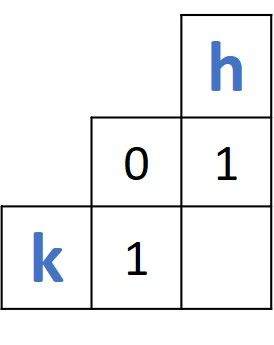

If the two characters located at the end of the two prefixes being compared are equal, then the distance is equal to the value in the top-left corner of the 2 x 2 matrix. This is implemented in the next if statement.

If the two characters are not equal, then the distance in the current cell is equal to the minimum of the three existing values in the 2 x 2 matrix after adding a cost of 1. An else block is added to the previous if statement to calculate such a distance according to the following code.

The distance is located at the bottom-right corner of the distances matrix and is returned.

In [ ]:
def levenshteinDistanceDP(token1, token2):
    distances = numpy.zeros((len(token1) + 1, len(token2) + 1))   #Creating the distance matrix

    for t1 in range(len(token1) + 1):   #initializing the first column
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):   #initializing the first row
        distances[0][t2] = t2

    a = 0
    b = 0
    c = 0

    for t1 in range(1, len(token1) + 1):               #Calculating Distances Between All Prefixes
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]

                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    # printDistances(distances, len(token1), len(token2))
    return distances[len(token1)][len(token2)]

def levenshteinDistanceMatrix(str1 , str2 ):
    return levenshteinDistanceDP(str1, str2)


**4. Printing The Distance Matrix**

After initializing both the first row and first column of the distances array, we'll use a function named printDistances() to print its contents using two for loops. It accepts three arguments:

**1. distances:** The 2-D matrix holding the distances.

**2. token1Length:** Length of the first word.

**3. token2Length:** Length of the second word.

In [ ]:
def printDistances(distances, token1Length, token2Length):
    for t1 in range(token1Length + 1):
        for t2 in range(token2Length + 1):
            print(int(distances[t1][t2]), end=" ")
        print()

Calling the levenshteinDistanceDP() function to print the final distance between the two words.

In [ ]:
levenshteinDistanceDP("sitting", "kitten")

#levenshteinDistanceMatrix("disatnce", "distance")


3.0

The distance between "sitting" and "kitten" is 3.


**5. Dictionary search for autocompletion/autocorrection**

The block of code below creates a function named calcDictDistance() which accepts two arguments, reads the dictionary, and calculates the distance between the search word and all words in the dictionary.

The first argument is named word and represents the search word to be compared by the words in the dictionary. The second argument is named numWords which accepts the number of matched words to be filtered.

The **calcDictDistance()** function reads the text file at the specified path using the open() function. The variable line iteratively holds each line (i.e. word) in the dictionary returned using the **readLines()** method. The calcDictDistance() function does not yet return anything, but we will soon change it to return a list holding the best-matched words.

Then it compares the search word with each word in the dictionary, calculate a distance, and store all distances in a list named dictWordDist. Its length is 3,000 because the dictionary contains 3,000 words.

The dictWordDist list is of type String and holds both the distance and the dictionary word separated by -. For example, if the distance between the search word and the word "follow" is two, then the entry saved in the dictWordDist list will be 2-follow. Later, the distance will be separated from the word using the split() method. This will return a list with two elements: the first is the distance, and the second is the word. The word is inserted into the closestWords list which is then returned by the calcDictDistance() function.

In [ ]:
def calcDictDistance(word, numWords):
    file = open('3000 words.txt', 'r')
    lines = file.readlines()
    file.close()
    dictWordDist = []
    wordIdx = 0

    for line in lines:        #variable line iteratively holds each line (i.e. word) in the dictionary returned using the readLines() method
        wordDistance = levenshteinDistanceMatrix(word, line.strip())
        if wordDistance >= 10:
            wordDistance = 9
        dictWordDist.append(str(int(wordDistance)) + "-" + line.strip())
        wordIdx = wordIdx + 1

    closestWords = []
    wordDetails = []
    currWordDist = 0
    dictWordDist.sort()    #The dictWordDist list is sorted to leave the best-matched words at the top of the list
    # print(dictWordDist)
    for i in range(numWords):
        currWordDist = dictWordDist[i]
        wordDetails = currWordDist.split("-") #returns a list with two elements: the first is the distance, and the second is the word
        closestWords.append(wordDetails[1]) #word is inserted into the closestWords list which is then returned by the calcDictDistance() function
    return closestWords

Calling the calcDictDistance() function and passing arguments. The search word is pape and the number of matches is 5.

In [ ]:
result = calcDictDistance("pape", 5)
for word in result:
  print(word)

pace
page
pale
paper
pipe


The output of the above code is given below. The Edit distance successfully helped in making good suggestions, especially for the first two words. By doing that, the user does not have to enter the complete word and by just entering some characters that discriminate the word, the program is able to make suggestions that help in either autocompletion or autocorrection.

**Conclusion:**

Using this similarity measure we were able to build a useful application of the Edit distance in which the user supplies a word and the program returns the best-matched words based on a dictionary search. This helps in autocompleting or autocorrecting text while a user is typing.